### Import Library and Dataset

In [1]:
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/algonacci/Data-Warehouse/main/HousingBoston.csv')
housing

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


### Data Rescaling

In [3]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

### Checking the shape

In [5]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (489, 3)
Shape of y: (489,)


### Splitting the data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 36)

print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


### Make the model

In [7]:
from sklearn.linear_model import LinearRegression 
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

### Evaluation using MAE, MSE, and RMSE

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error   
import numpy as np

#Calculating MSE, the lower the value, the better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

Mean squared error of testing set: 0.009971445617917912
Mean absolute error of testing set: 0.07535999511736191
Root Mean Squared Error of testing set: 0.0998571260247255


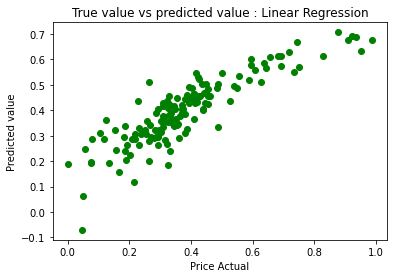

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()